# DESCRIPTION

#### Objective: Make a model to predict the factors that play a significant role in the increasing heart attacks. 


### Problem Statement : 

Cardiovascular diseases are the leading cause of death globally. To identify the causes and to develop a system to predict heart attack in an effective manner is necessary. The presented data has all information about all the relevant factors that might have an impact on heart health. The data needs to be explained in detail for any further analysis.

#### Domain : Healthcare 

Analysis to be done : The problem is to determine and examine the factors that play a sinificant role in increasing the rate of heart attacks. 

In [5]:
import sys # importing the sys module

print (sys.version) 

3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]


In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### Steps to perform:
#### 1. Load the data file using pandas.

In [8]:
df = pd.read_csv('data.csv')

Display the first five rows of the data set

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Variable description 
* age -	 age in years
* sex -	 (1 = male; 0 = female)
* cp -	 chest pain type
* trestbps - 	 resting blood pressure (in mm Hg on admission to the hospital)
* chol - 	 serum cholestoral in mg/dl
* fbs -	 (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg - 	 resting electrocardiographic results
* thalach - 	 maximum heart rate achieved
* exang - 	 exercise induced angina (1 = yes; 0 = no)
* oldpeak - 	 ST depression induced by exercise relative to rest
* slope - 	 the slope of the peak exercise ST segment
* ca -	 number of major vessels (0-3) colored by flourosopy
* thal -	1=  normal; 2 = fixed defect; 3 = reversable defect
* target - 1 or 0


* Checking for the concise summary of the given data set which also reflects if we have any null values

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1000 non-null   int64  
 1   sex       1000 non-null   int64  
 2   cp        1000 non-null   int64  
 3   trestbps  1000 non-null   int64  
 4   chol      1000 non-null   int64  
 5   fbs       1000 non-null   int64  
 6   restecg   1000 non-null   int64  
 7   thalach   1000 non-null   int64  
 8   exang     1000 non-null   int64  
 9   oldpeak   1000 non-null   float64
 10  slope     1000 non-null   int64  
 11  ca        1000 non-null   int64  
 12  thal      1000 non-null   int64  
 13  target    1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


* Check for null values in the data. Get the number of null values for each column.

In [15]:
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

* Check for any duplicates values in the given data set

In [18]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
14,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
30,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
42,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
53,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
59,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
996,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
997,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
998,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


* Drop the Duplicated data 

In [20]:
df1=df.drop_duplicates()

In [21]:
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
715,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
720,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
821,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


Now, to explore the data, categories it into continuous & categorical columns 
* Categorical Variables Columns: sex, cp, fbs, restecg, exang, slope, ca, thal, target* 
Continous Variable Columnss: age, trestbps, chol, thalach, oldpeak

### To check the distribution for different columns either we can use distribution plot (distplot) or Histograms (histplot)
##### * Distribution Plot for continuous variable age

C:\Users\PRERNA\AppData\Local\Temp\ipykernel_9584\3787714650.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1.age)


<Axes: xlabel='age', ylabel='Density'>

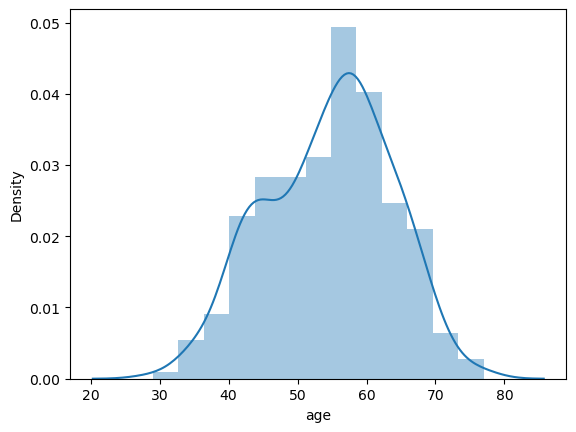

In [24]:
sns.distplot(df1.age)

<Axes: xlabel='age', ylabel='Count'>

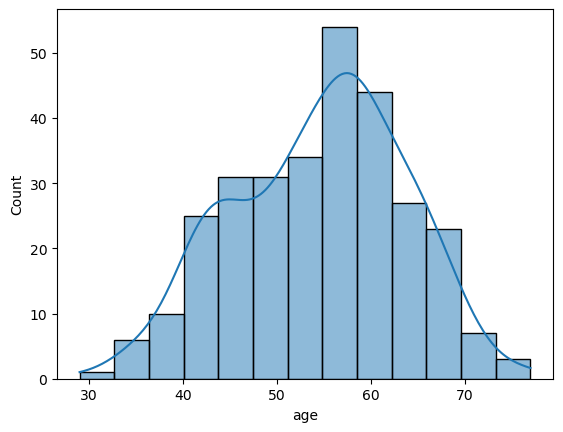

In [25]:
# Histogram for age 
sns.histplot(df1.age, kde = True)

In [26]:
df1.age.describe()

count    296.000000
mean      54.523649
std        9.059471
min       29.000000
25%       48.000000
50%       56.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

##### * Histogram Plot for continuous variable trestbps

<Axes: xlabel='trestbps', ylabel='Count'>

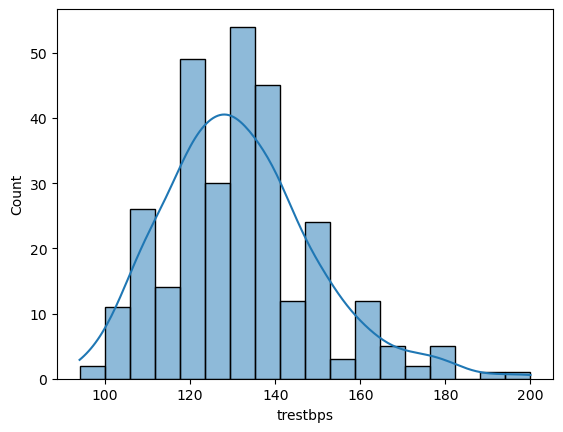

In [28]:
sns.histplot(df1.trestbps, kde = True)

* Histogram Plot for continuous variable chol

<Axes: xlabel='chol', ylabel='Count'>

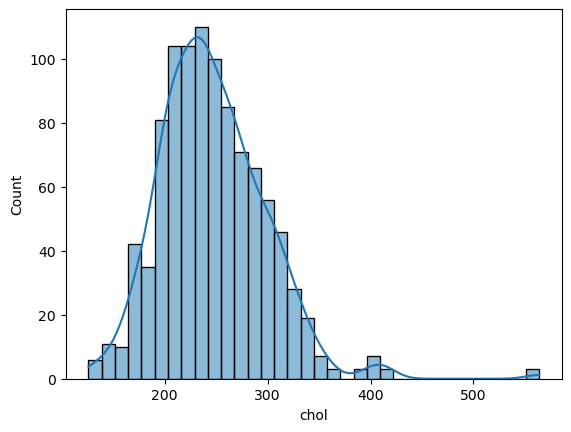

In [30]:
sns.histplot(df.chol, kde = True)

* Histogram Plot for continuous variable Thalach

<Axes: xlabel='thalach', ylabel='Count'>

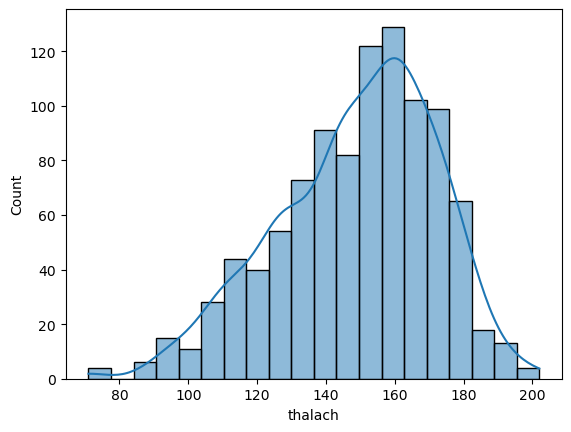

In [32]:
sns.histplot(df.thalach, kde = True)

* Histogram Plot for continuous variable oldpeak

<Axes: xlabel='oldpeak', ylabel='Count'>

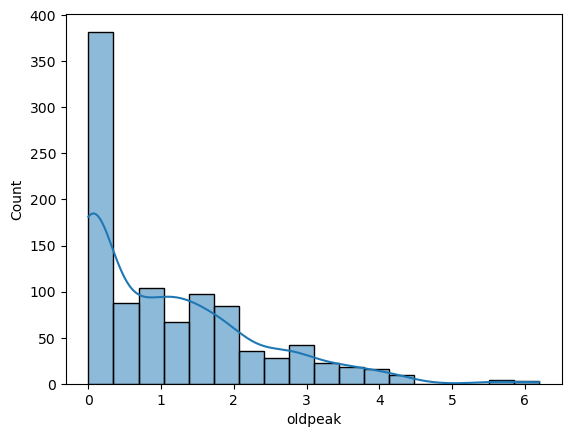

In [34]:
sns.histplot(df.oldpeak, kde = True)

#### Checking for the outliers for all the continuous variables

* Outliers for Age

<Axes: ylabel='age'>

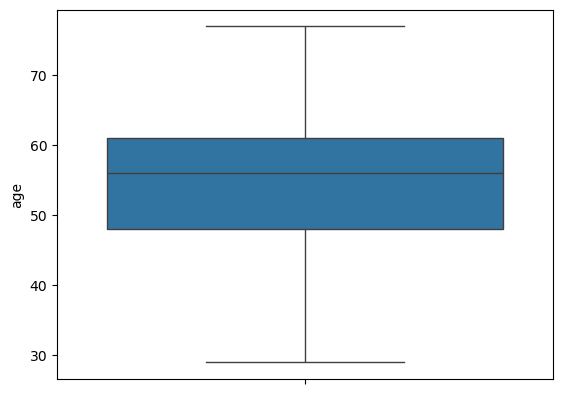

In [37]:
sns.boxplot(df1.age)

* No Outliers exist for the variable "Age"

#### Now checking ouliers for the variable "Trestbps"

<Axes: ylabel='trestbps'>

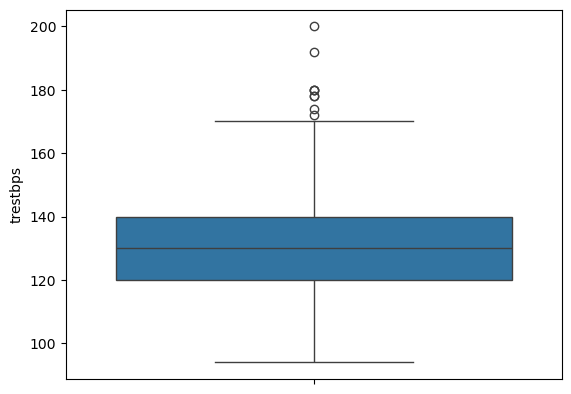

In [40]:
sns.boxplot(df1.trestbps)

* Few outliers exist for the trestbps, we need to treat these outliers with capping 

In [42]:
Q3_trest = np.percentile(df1.trestbps, 75)
Q1_trest = np.percentile(df1.trestbps, 25)
IQR_trest = Q3_trest - Q1_trest
out_trest = Q3_trest + (1.5*IQR_trest)

In [43]:
out_trest

170.0

In [44]:
df1[df1.trestbps > out_trest]['trestbps']

28     180
46     178
84     174
133    180
147    192
171    200
333    172
384    180
512    178
Name: trestbps, dtype: int64

<Axes: ylabel='chol'>

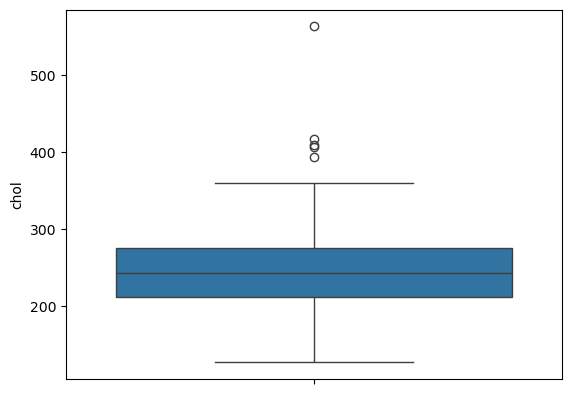

In [45]:
sns.boxplot(df1.chol)

In [46]:
Q3_chol = np.percentile(df1.chol, 75)
Q1_chol = np.percentile(df1.chol, 25)
IQR_chol = Q3_chol - Q1_chol
out_chol = Q3_chol + (1.5*IQR_chol)

In [47]:
out_chol

371.625

In [48]:
df1[df1.chol > out_chol]['chol']

120    417
154    564
175    409
249    394
436    407
Name: chol, dtype: int64

#### Checking for the outliers for continuous variable thalach

<Axes: ylabel='thalach'>

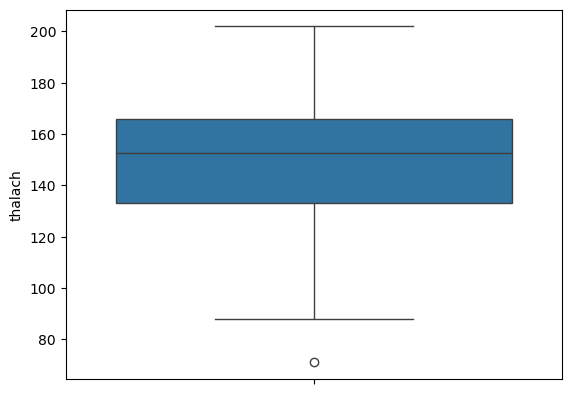

In [50]:
sns.boxplot(df1.thalach)

* A few outliers exist which can be ignored. 

#### Checking for the outliers for continuous variable for oldpeak

<Axes: ylabel='oldpeak'>

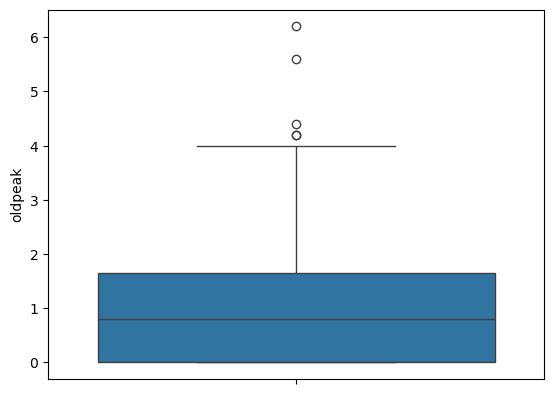

In [53]:
sns.boxplot(df1.oldpeak)

* We can treat these outliers by capping. 

In [55]:
Q3_oldpeak = np.percentile(df1.oldpeak, 75)
Q1_oldpeak = np.percentile(df1.oldpeak, 25)
IQR_oldpeak = Q3_oldpeak - Q1_oldpeak
out_oldpeak = Q3_oldpeak + (1.5*IQR_oldpeak)
out_oldpeak

4.125

In [56]:
df1[df1.oldpeak > out_oldpeak]['oldpeak']

6      4.4
13     4.2
52     5.6
67     6.2
512    4.2
Name: oldpeak, dtype: float64

In [57]:
# Checking for the index having values greater than out_trest
df1[df1.trestbps > out_trest].index


Index([28, 46, 84, 133, 147, 171, 333, 384, 512], dtype='int64')

In [58]:
# Checking for the index having values greater than out_chol
df1[df1.chol > out_chol].index


Index([120, 154, 175, 249, 436], dtype='int64')

In [59]:
# Checking for the index having values greater than out_oldpeak 
df1[df1.oldpeak > out_oldpeak].index

Index([6, 13, 52, 67, 512], dtype='int64')

In [60]:
# Replacing the values in the dataframe with the capping values 
df1.loc[df1[df1.trestbps > out_trest].index, 'trestbps'] = out_trest
df1.loc[df1[df1.chol > out_chol].index, 'chol'] = out_chol
df1.loc[df1[df1.oldpeak > out_oldpeak].index, 'oldpeak'] = out_oldpeak

In [61]:
df1.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212.0,0,1,168,0,1.000,2,2,3,0
1,53,1,0,140,203.0,1,0,155,1,3.100,0,0,3,0
2,70,1,0,145,174.0,0,1,125,1,2.600,0,0,3,0
3,61,1,0,148,203.0,0,1,161,0,0.000,2,1,3,0
4,62,0,0,138,294.0,1,1,106,0,1.900,1,3,2,0
5,58,0,0,100,248.0,0,0,122,0,1.000,1,0,2,1
6,58,1,0,114,318.0,0,2,140,0,4.125,0,3,1,0
7,55,1,0,160,289.0,0,0,145,1,0.800,1,1,3,0
8,46,1,0,120,249.0,0,0,144,0,0.800,2,0,3,0
9,54,1,0,122,286.0,0,0,116,1,3.200,1,2,2,0


### Checking the relationship between categorical values and the target

#### Crosstab between categorical value "Sex" and "target"

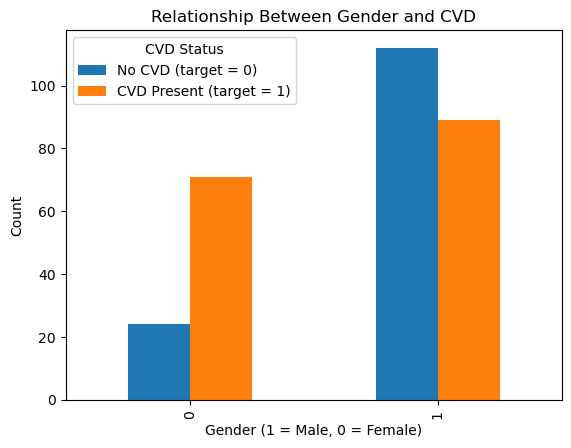

In [64]:
pd.crosstab(df1.sex, df1.target).plot(kind='bar')

# Add titles and labels for better interpretation
plt.title('Relationship Between Gender and CVD')
plt.xlabel('Gender (1 = Male, 0 = Female)')
plt.ylabel('Count')
plt.legend(['No CVD (target = 0)', 'CVD Present (target = 1)'], title='CVD Status')

#### Possible Observations

With the help of above graph we can conclude that the count for having CVD among males & females is similar, so there is no strong relationship gender & target. 


### * Crosstab to show counts of the Chest pain type vs. CVD occurrence

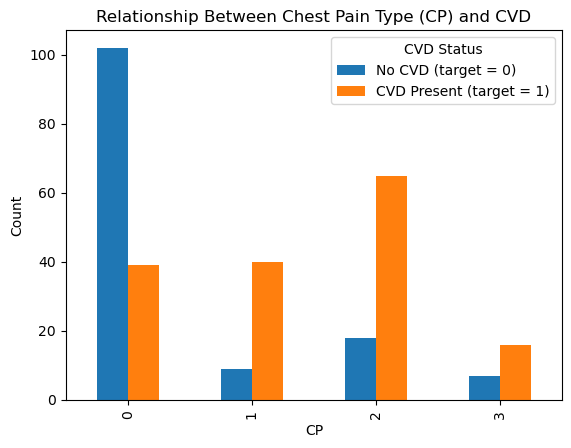

In [67]:
pd.crosstab(df1.cp, df1.target).plot(kind='bar')

# Add titles and labels for better interpretation
plt.title('Relationship Between Chest Pain Type (CP) and CVD')
plt.xlabel('CP')
plt.ylabel('Count')
plt.legend(['No CVD (target = 0)', 'CVD Present (target = 1)'], title='CVD Status')

#### Possible Observations
With the help of above graph we can say that for Correlation between chest pain type and CVD occurence is strong. 

### * Crosstab to show counts of the Fasting Blood Sugar(Fbs) vs. CVD occurrence

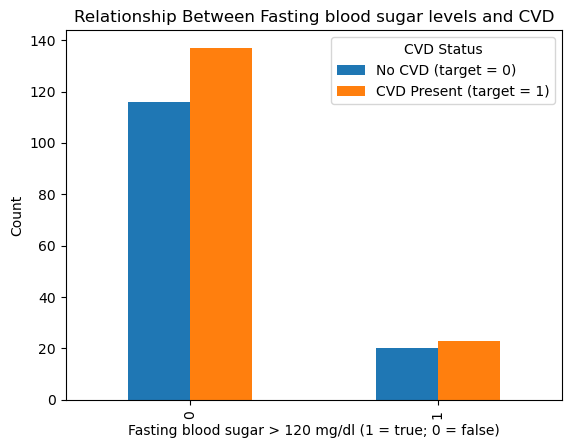

In [70]:
pd.crosstab(df1.fbs, df1.target).plot(kind='bar')

# Add titles and labels for better interpretation
plt.title('Relationship Between Fasting blood sugar levels and CVD')
plt.xlabel('Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)')
plt.ylabel('Count')
plt.legend(['No CVD (target = 0)', 'CVD Present (target = 1)'], title='CVD Status')

#### Possible Observation

Both the target values are showing a balanced distribution of CVD presence, implying no strong correlation.

### * Crosstab to show counts of the resting ECG results vs. CVD occurrence

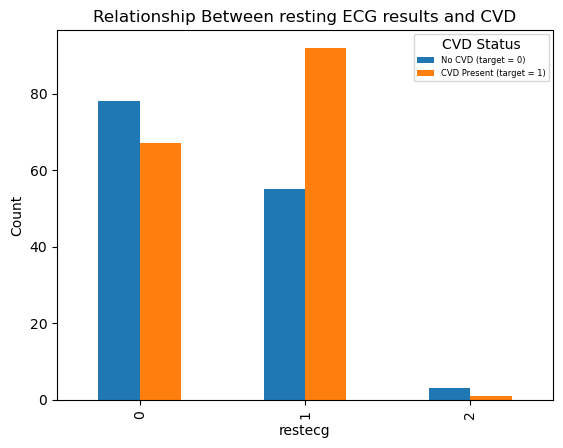

In [73]:
pd.crosstab(df1.restecg, df1.target).plot(kind='bar')

# Add titles and labels for better interpretation
plt.title('Relationship Between resting ECG results and CVD')
plt.xlabel('restecg')
plt.ylabel('Count')
plt.legend(['No CVD (target = 0)', 'CVD Present (target = 1)'], title='CVD Status' , prop = {'size' : 6})

#### Possible Observation

When resting electrocardiographic result is 1, there is more chances for CVD occurence although difference between target is not a remarkable difference.  

### * Crosstab to show counts of the excercise induced angina (exang) vs. CVD occurrence

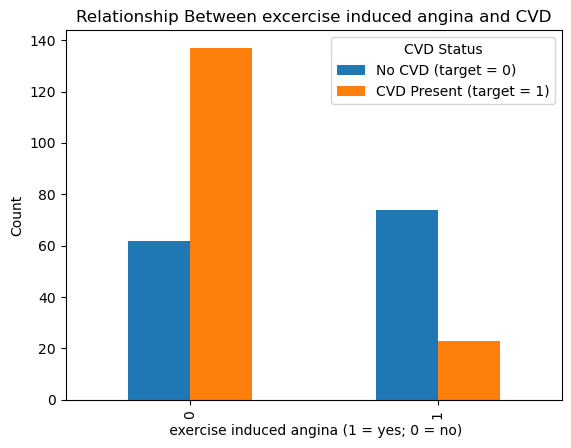

In [76]:
pd.crosstab(df1.exang, df1.target).plot(kind='bar')

# Add titles and labels for better interpretation
plt.title('Relationship Between excercise induced angina and CVD')
plt.xlabel(' exercise induced angina (1 = yes; 0 = no)')
plt.ylabel('Count')
plt.legend(['No CVD (target = 0)', 'CVD Present (target = 1)'], title='CVD Status')

#### Possible Observation 

When there is no exercise induced angina, there is very high chances for having CVD occurence showing a strong relationship. 

### * Crosstab to show counts of the slope of the peak exercise ST segment vs. CVD occurrence

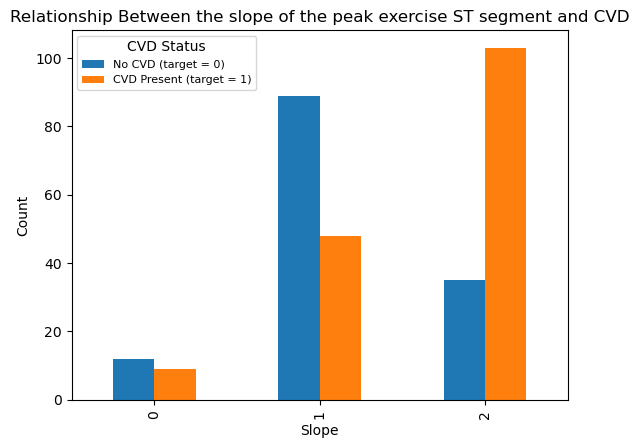

In [79]:

pd.crosstab(df1.slope, df1.target).plot(kind='bar')

# Add titles and labels for better interpretation
plt.title('Relationship Between the slope of the peak exercise ST segment and CVD')
plt.xlabel('Slope')
plt.ylabel('Count')
plt.legend(['No CVD (target = 0)', 'CVD Present (target = 1)'], title='CVD Status', prop={'size':8})



#### Possible Observations
Higher Risk for Specific Thalassemia Types:

For Slope = 2 shows significantly more target = 1 cases, it suggests a strong correlation between that type of Slope and CVD.

however another type of slope = 1 has more target = 0 cases, it might indicate that individuals with slope = 1 are less likely to experience CVD.


### * Crosstab to show counts of number of major vessels (0-3) colored by flourosopy vs. CVD occurrence

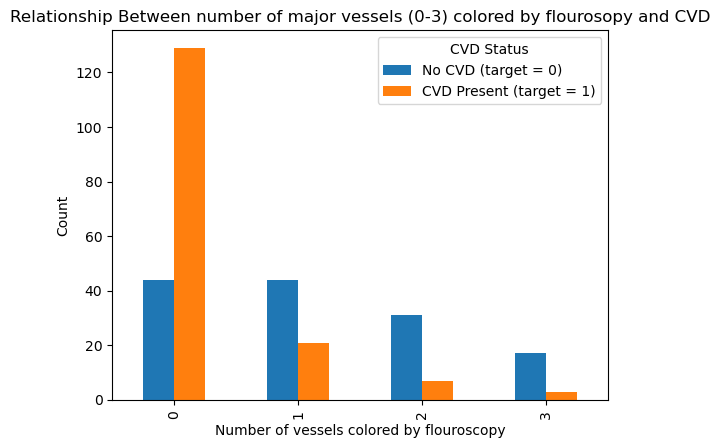

In [82]:

pd.crosstab(df1.ca, df1.target).plot(kind='bar')

# Add titles and labels for better interpretation
plt.title('Relationship Between number of major vessels (0-3) colored by flourosopy and CVD')
plt.xlabel('Number of vessels colored by flouroscopy')
plt.ylabel('Count')
plt.legend(['No CVD (target = 0)', 'CVD Present (target = 1)'], title='CVD Status')



#### Possible Observations

Higher Risk for Specific number of vessels colored by flouroscopy:

for 0 number of vessels colored by flouroscopy shows a strong correlation between CA and CVD, for rest not showing any remarkable relationship.



### * Crosstab to show counts of thalassemia types vs. CVD occurrence

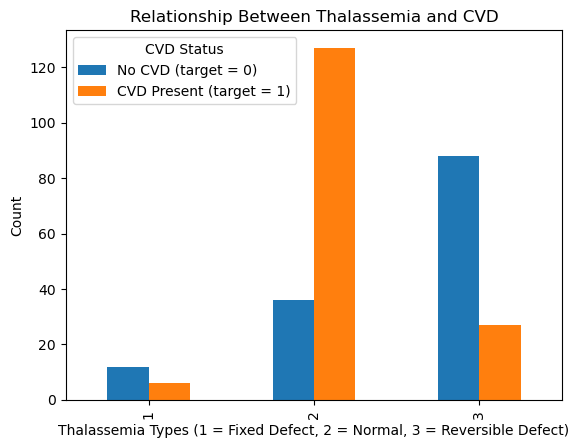

In [85]:

pd.crosstab(df1.thal, df1.target).plot(kind='bar')

# Add titles and labels for better interpretation
plt.title('Relationship Between Thalassemia and CVD')
plt.xlabel('Thalassemia Types (1 = Fixed Defect, 2 = Normal, 3 = Reversible Defect)')
plt.ylabel('Count')
plt.legend(['No CVD (target = 0)', 'CVD Present (target = 1)'], title='CVD Status')

#### Possible Observations

Higher Risk for Specific Thalassemia Types:

In a certain type of thal ( 2 = Normal Defect) shows significantly more target = 1 cases, it suggests a strong correlation between that type of thalassemia and CVD.

## Relationship with Continuous variable and CVD occurence (Target)

##### Boxplot for the continuous variable "Age" and "Target"

<Axes: xlabel='target', ylabel='age'>

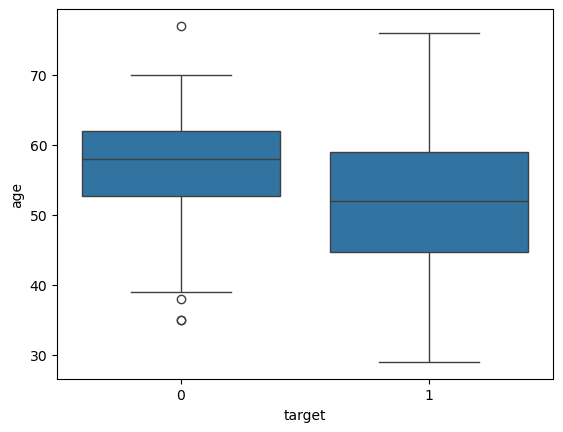

In [89]:
sns.boxplot(x = df1.target, y=df1.age)

##### Bar plot for the continuous variable "Age" and "Target"

<Axes: xlabel='age'>

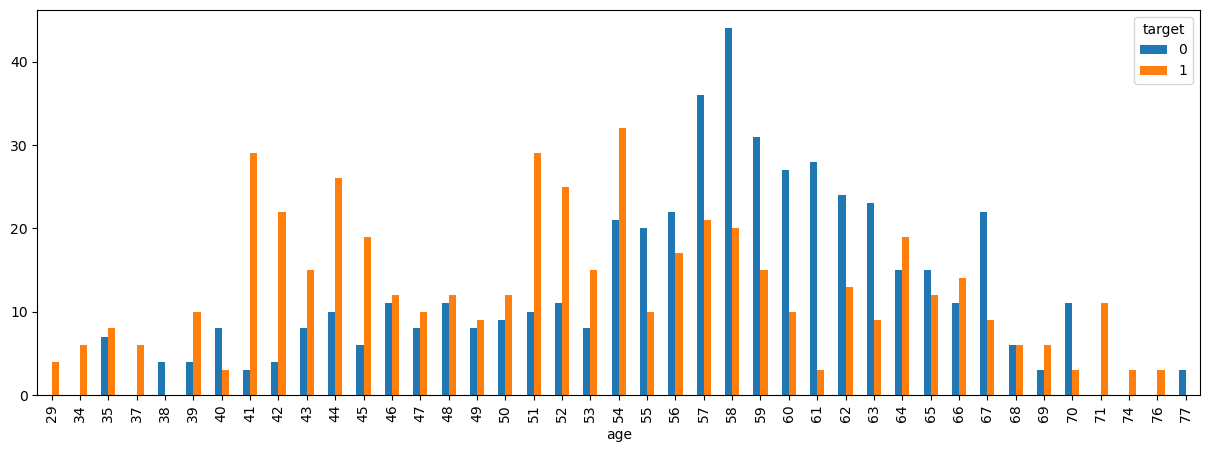

In [91]:
pd.crosstab(df.age, df.target).plot(kind ="bar", figsize =(15,5) )

In [ ]:
# At every stage of age we are getting mixed output which implies a weak correaltion with the target

#### Boxplot for the continuous variable "tresbps" and "Target"

<Axes: xlabel='target', ylabel='trestbps'>

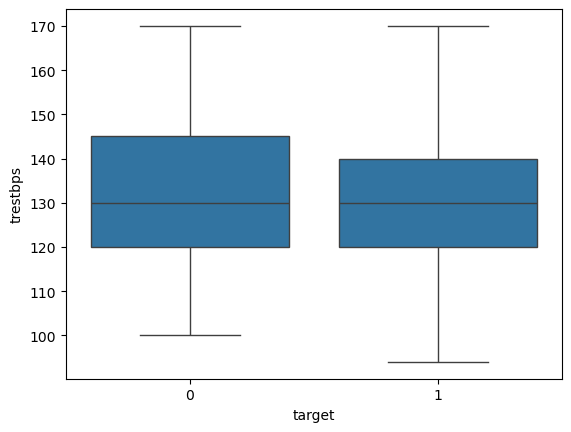

In [93]:
sns.boxplot(x = df1.target, y=df1.trestbps)

#### Bar plot for the continuous variable "trestbps" and "Target"

<Axes: xlabel='trestbps'>

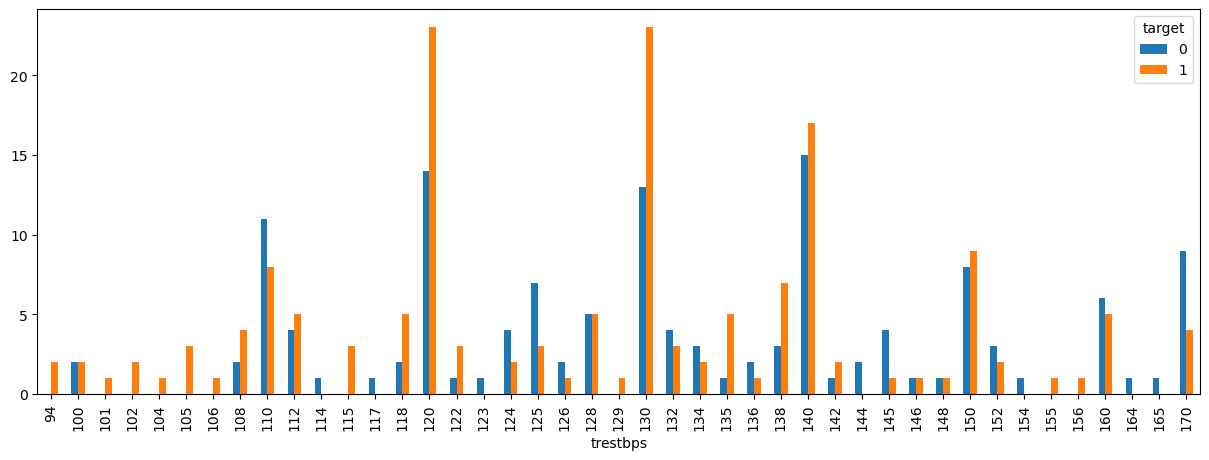

In [95]:
pd.crosstab(df1.trestbps, df1.target).plot(kind ="bar", figsize =(15,5) )

In [ ]:
# We are getting mixed output with the above barplot which implies a weak correaltion with the target

In [96]:
df_temp = df1[df1.trestbps < 170][['trestbps', 'target']]

<Axes: xlabel='trestbps'>

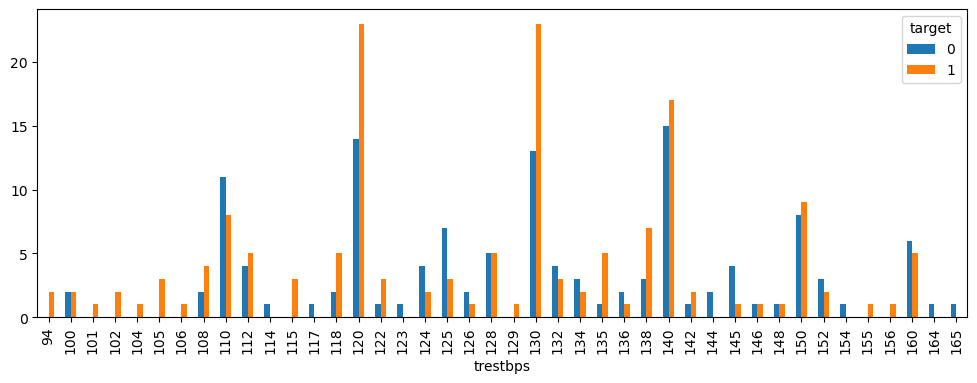

In [97]:
pd.crosstab(df_temp.trestbps, df_temp.target).plot(kind='bar', figsize=(12,4))


#### Boxplot for the continuous variable "Chol" and "Target"

<Axes: xlabel='target', ylabel='chol'>

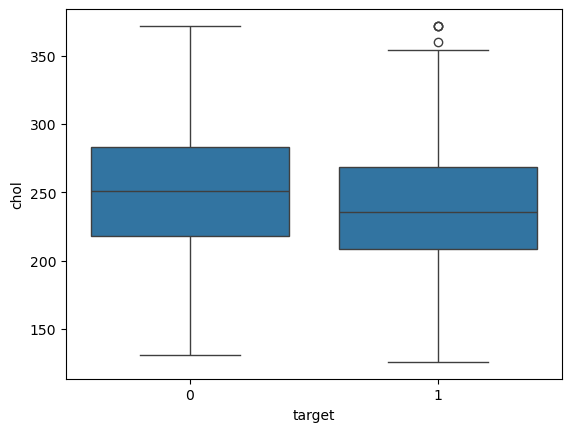

In [99]:
sns.boxplot(x=df1.target, y=df1.chol)

#### Barplot for the continuous variable "Chol" and "Target"

<Axes: xlabel='chol'>

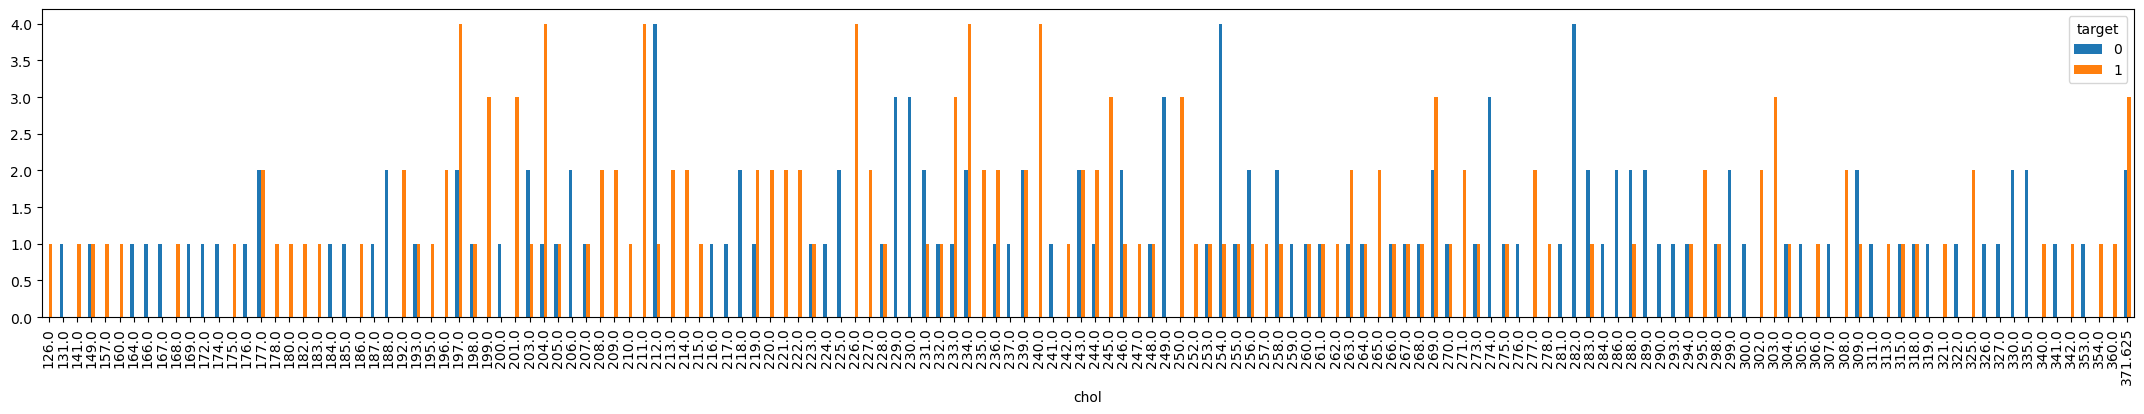

In [101]:
pd.crosstab(df1.chol, df1.target).plot(kind='bar', figsize=(27,4))

* Crossplot without any outliers values 

In [103]:
df_temp = df1[df1.chol < 350][['chol', 'target']]

<Axes: xlabel='chol'>

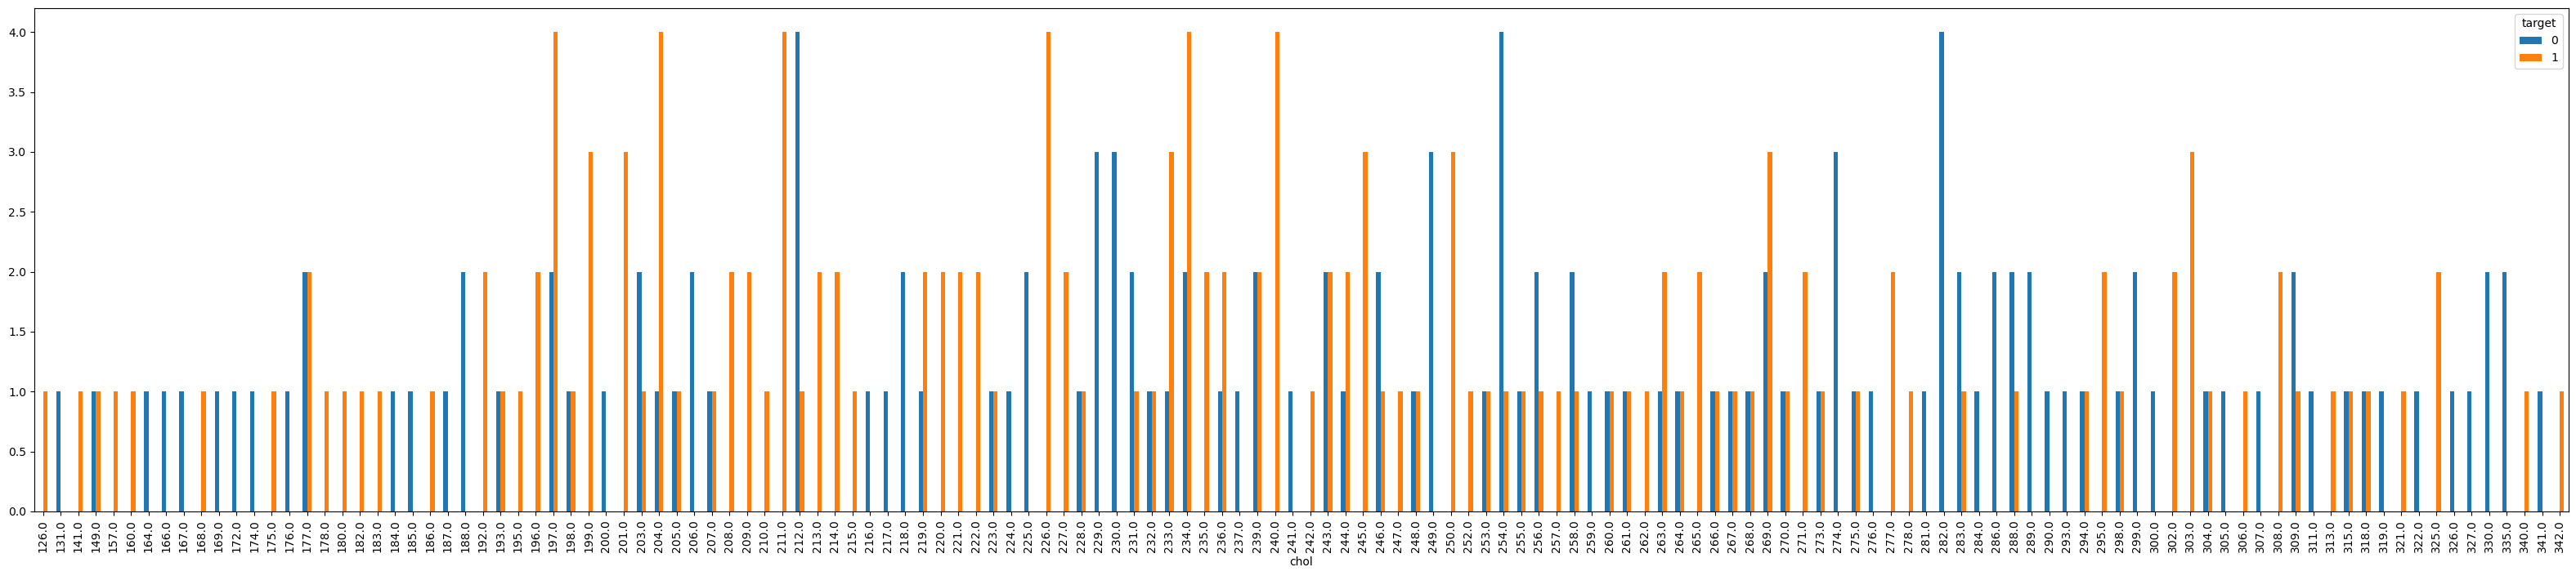

In [104]:
pd.crosstab(df_temp.chol, df_temp.target).plot(kind='bar', figsize=(40,8))

In [142]:
# No proper differentiation visible with the graph, hence we  can say there is no strong relation among chol and target variable

#### Boxplot for the continuous variable "thalach" and "Target"

<Axes: xlabel='target', ylabel='thalach'>

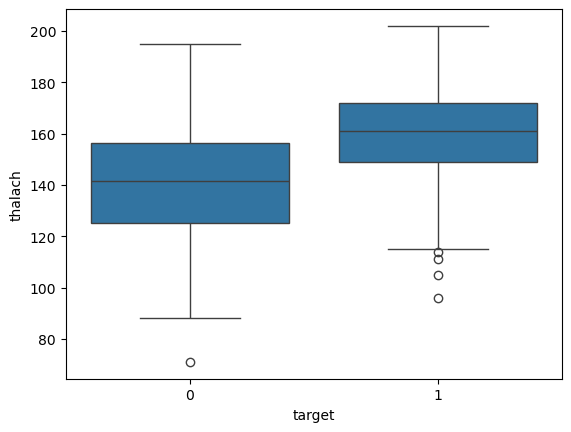

In [148]:
sns.boxplot(x=df1.target, y=df1.thalach)

#### Barplot for the continuous variable "thalach" and "Target"

<Axes: xlabel='thalach'>

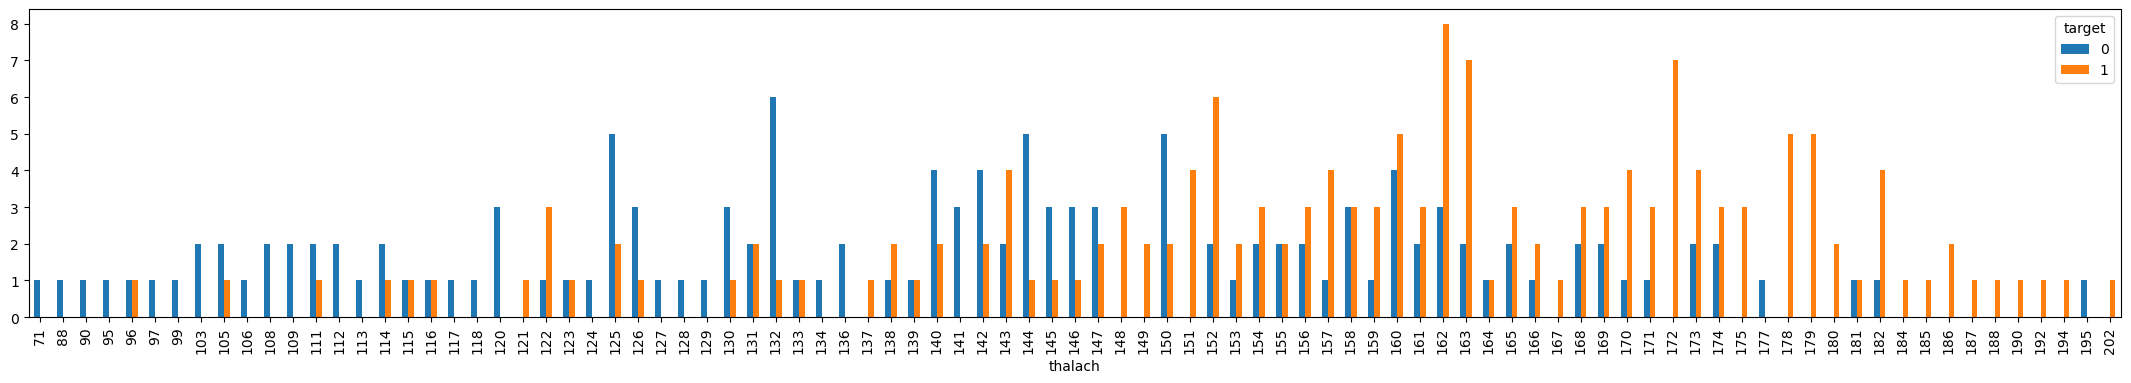

In [154]:
pd.crosstab(df1.thalach, df1.target).plot(kind='bar', figsize=(27,4))

In [156]:
# With the increase in the heart rate, the occurence of CVD is also increasing indicating there is a strong positive relatonship among target and thalach (maximum heart rate achieved).

#### Boxplot for the continuous variable "Oldpeak" and "Target"

<Axes: xlabel='target', ylabel='oldpeak'>

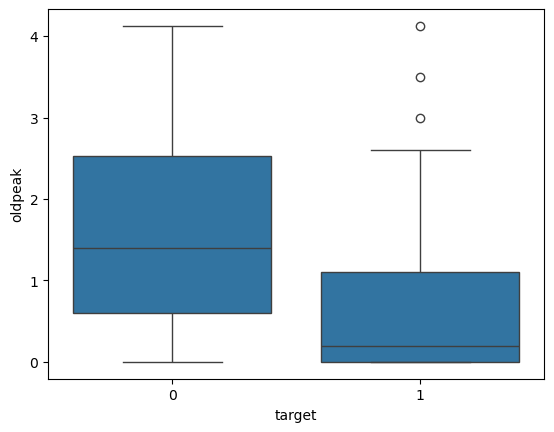

In [160]:
sns.boxplot(x=df1.target, y=df1.oldpeak)

#### Crossplot for the continuous variable "Oldpeak" and "Target"

<Axes: xlabel='oldpeak'>

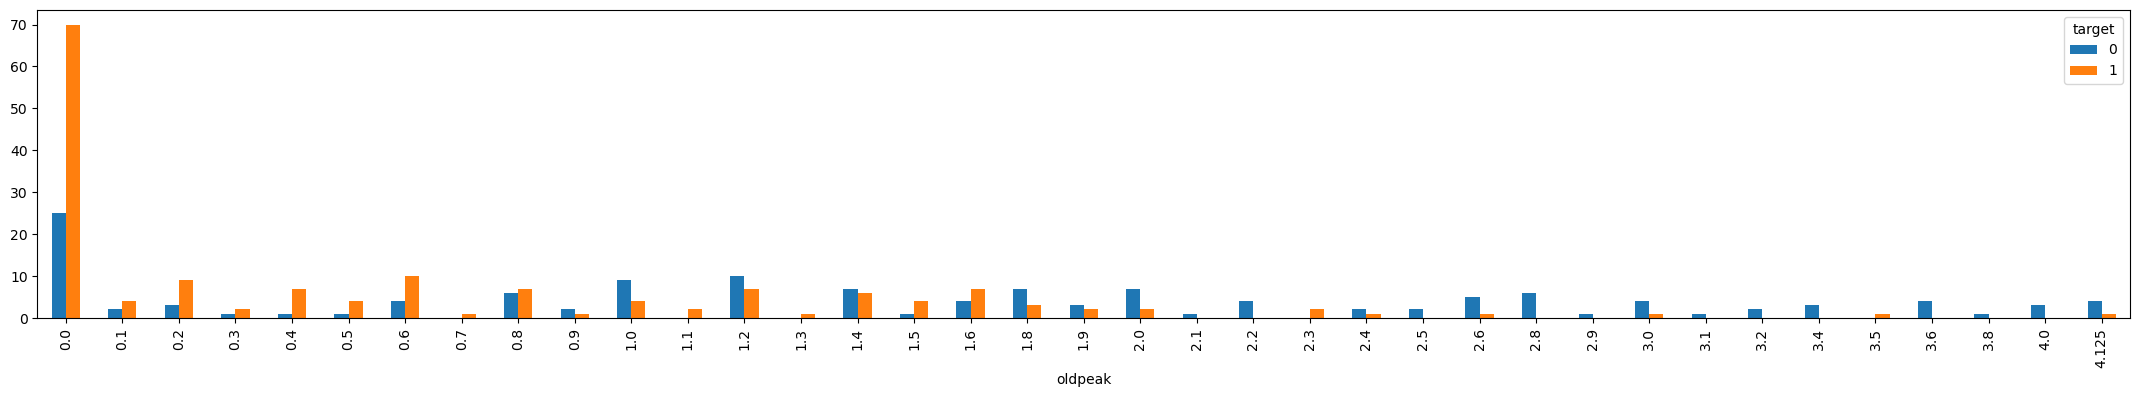

In [164]:
pd.crosstab(df1.oldpeak, df1.target).plot(kind='bar', figsize=(27,4))

In [166]:
# There is no correlation between oldpeak and target variable hence it can be ignored from the predictors list

#### Boxplot for the categorical variable "slope" and "Target"

<Axes: xlabel='target', ylabel='slope'>

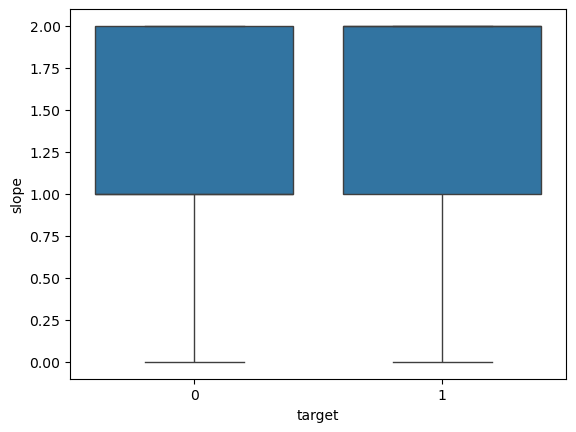

In [106]:
sns.boxplot(x=df1.target, y=df1.slope)

##### Boxplot for the categorical variable "slope" and "Target"

<Axes: xlabel='slope'>

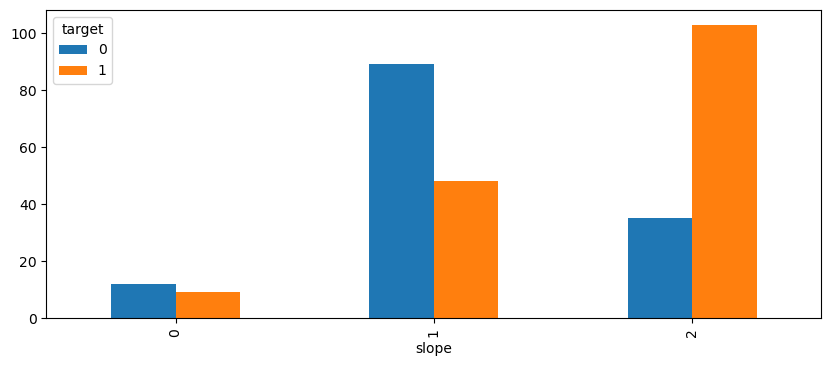

In [108]:
pd.crosstab(df1.slope, df1.target).plot(kind='bar', figsize=(10,4))

In [144]:
# For slope 2, the rsik for having CVD is maximum, we can there might be a considerable dependency over the slope variable with the target variable

### Pair Plot

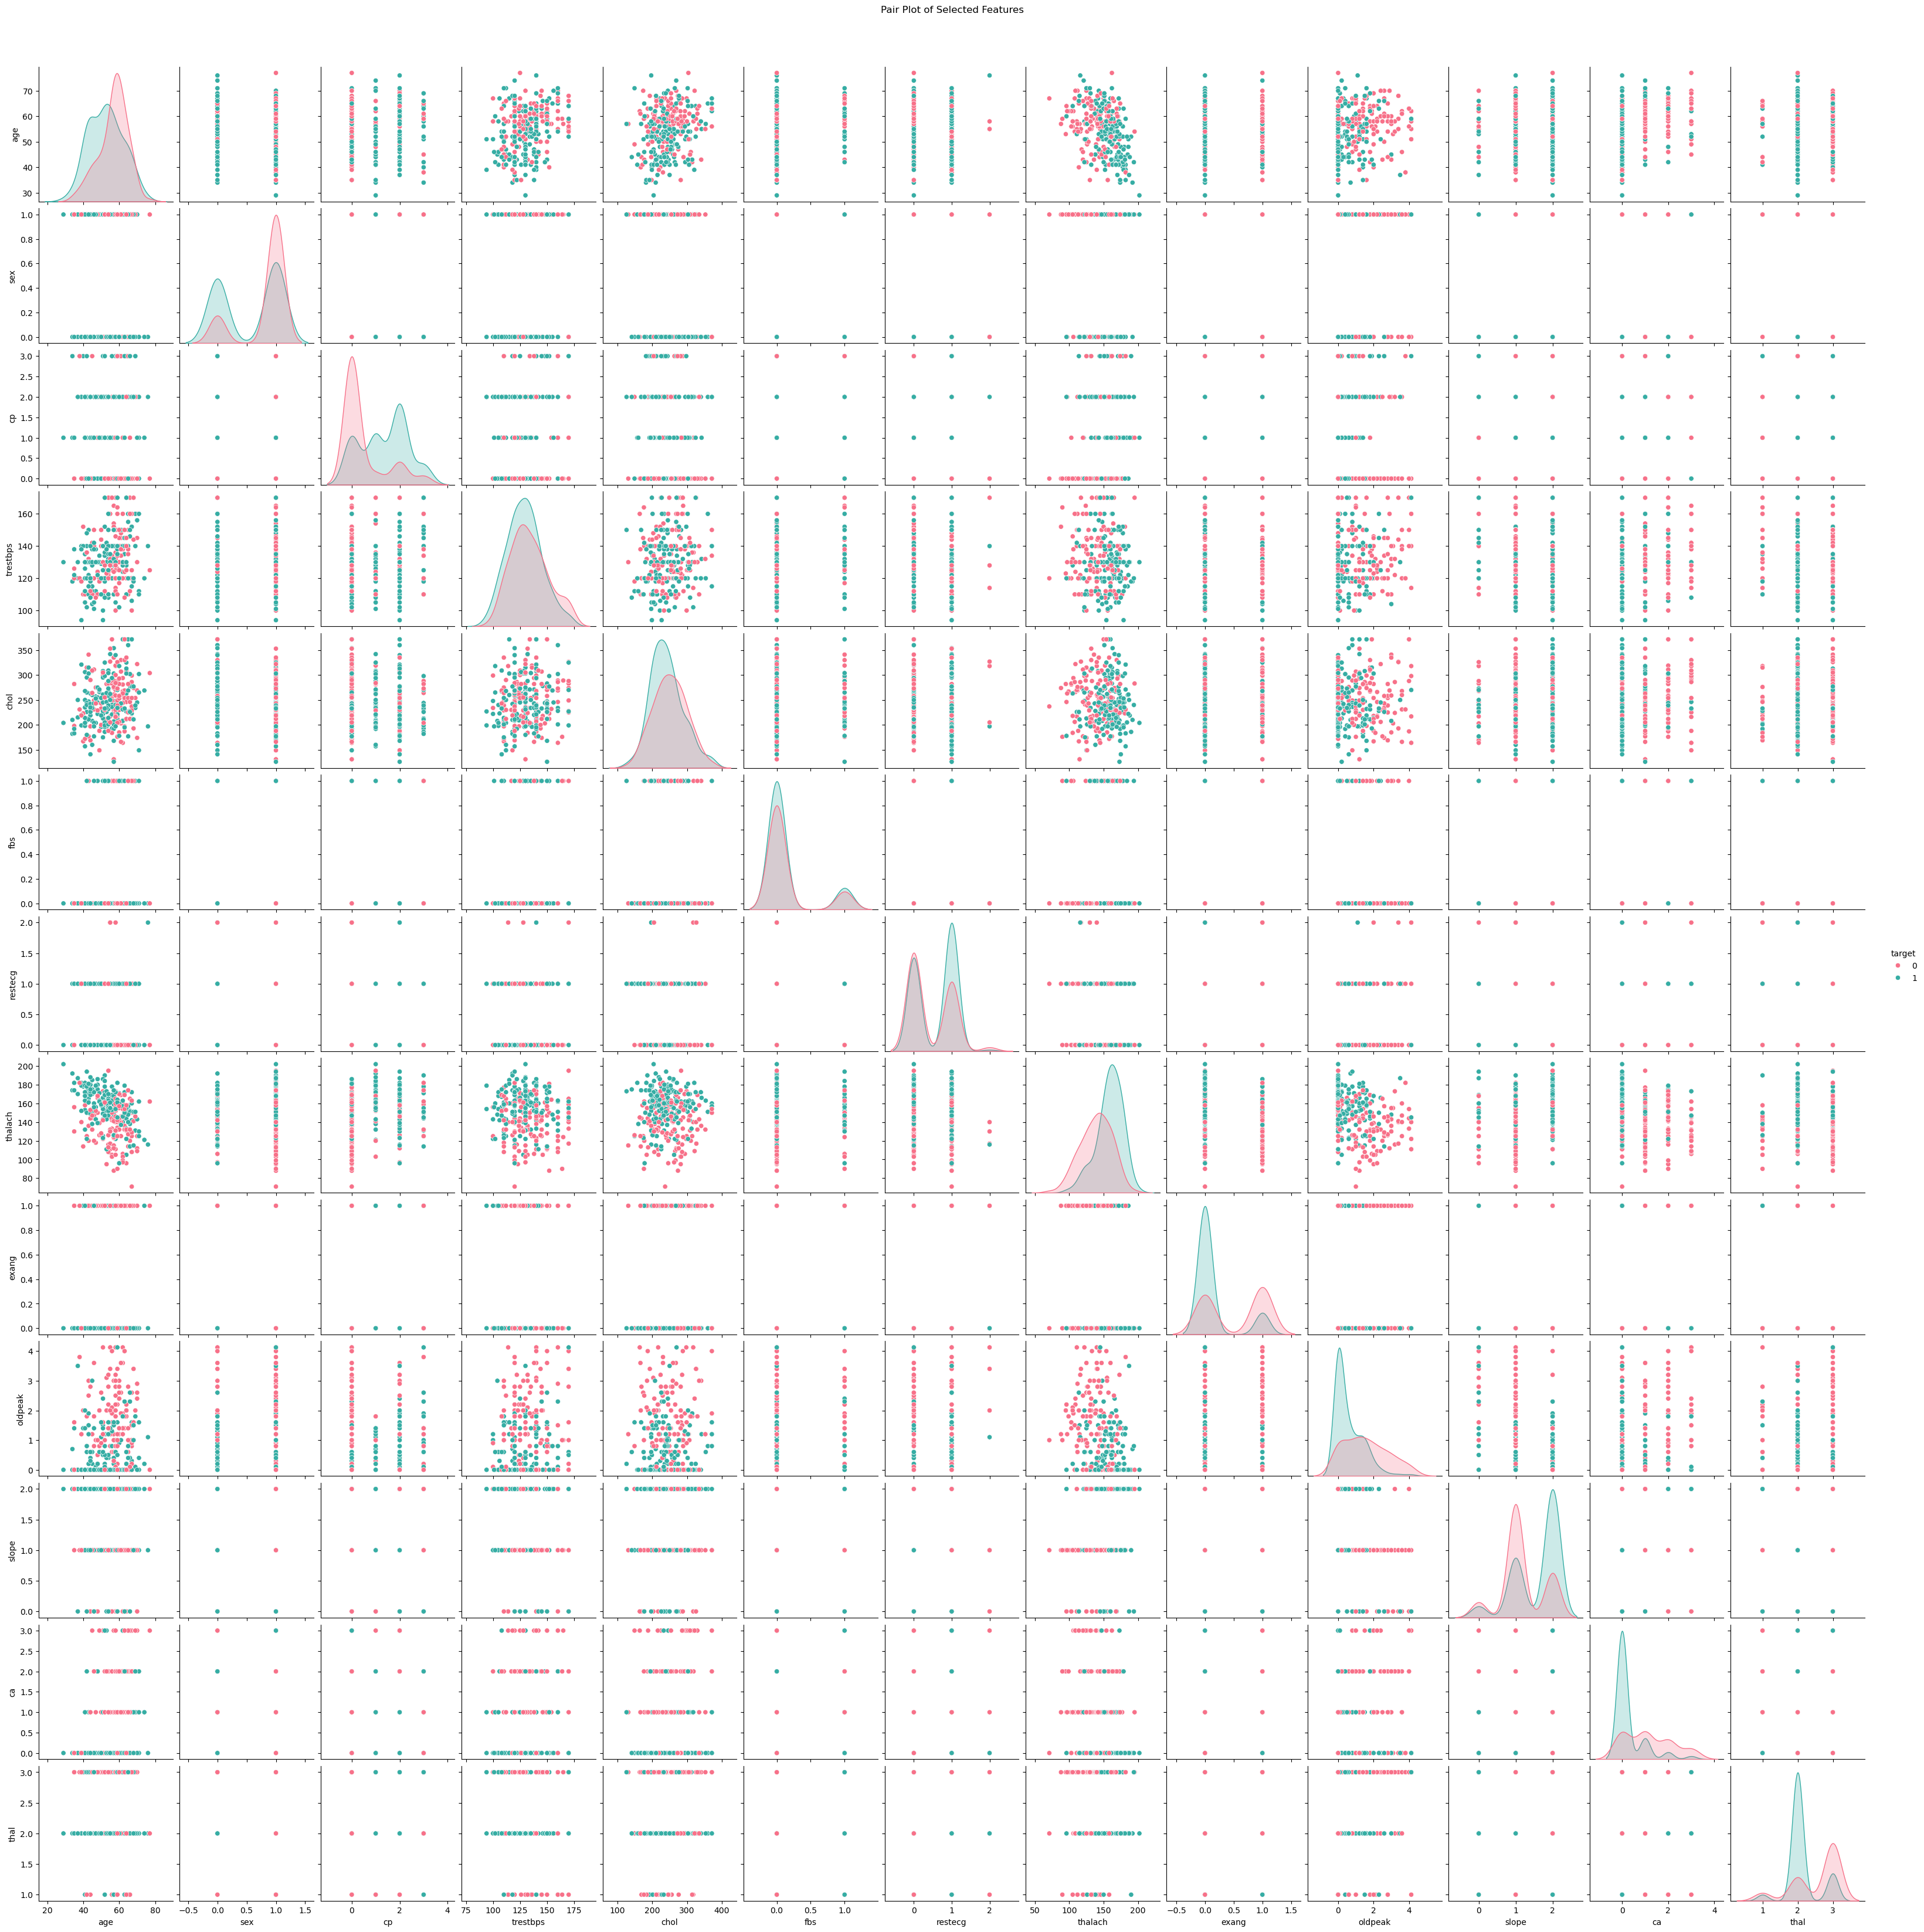

In [110]:
sns.pairplot(df1, hue = 'target' , palette='husl', diag_kind='kde')

# Title for better context
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

### Insights You Might Observe:
* Strong clustering of specific feature combinations (e.g., chol vs. thalach) indicating potential relationships.
* Patterns showing which feature combinations are more predictive of target.
* Key variables with overlapping distributions between target=0 and target=1, indicating less discriminative power.

### Interpreting the Pair Plot

#### Diagonal Plots (KDE or Histogram):

- These show the distribution of individual features.
- Look for differences in distributions between target=0 (no CVD) and target=1 (CVD present).
Example: If chol (cholesterol) has a higher peak for target=1, it might indicate a correlation between high cholesterol levels and CVD.
Scatterplots (Off-Diagonal):

#### Scatterplots (Off-Diagonal):

 - These display relationships between pairs of features.
 - Check for clustering or separable patterns based on the target color:
 * Clustering: If points with the same target value cluster together, the features are good predictors.
 * Overlap: Significant overlap may indicate that the features alone aren’t sufficient to distinguish target.

#### Feature-Specific Observations:

- Age vs. Cholesterol (age vs. chol):
Are older patients with high cholesterol more likely to have CVD?

- Resting Blood Pressure (trestbps) vs. Maximum Heart Rate (thalach):
Can patients with high blood pressure but lower heart rates be distinguished by target?

- Oldpeak vs. Other Features:
Since oldpeak represents ST depression during exercise, look for patterns indicating that higher values are associated with CVD.

#### General Trends:

Look for outliers that might indicate data errors or unique cases.
Observe feature combinations where target classes overlap less—these are strong predictors.

#### Conclusions:
 - If patients with thalach (max heart rate) below a threshold frequently have target=1, this suggests that lower exercise heart rates might correlate with CVD.
 - Significant separation in oldpeak values between target groups could indicate its strong predictive value.

In [113]:
## Perform standard scaling on the continous data

## Saperate the X (Predictors) and y(target)

## Perform the train test split

## fit the train data on Logistic Reg

## Evaluate the model using classification report and ROC

#### Perform the scaling on the continuous variable so that all the features will be comparable efficiently  

In [134]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler

# Define the continuous variables to scale
continuous_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Initialize the scaler
scaler = StandardScaler()

# Scale the continuous variables
scaled_data = scaler.fit_transform(df[continuous_vars])

# Convert the scaled data back to a DataFrame for easier handling
scaled_df = pd.DataFrame(scaled_data, columns=continuous_vars)

# Drop the original continuous columns from the dataset
df_dropped = df.drop(columns=continuous_vars)

# Concatenate the scaled data with the rest of the dataset
df_scaled = pd.concat([df_dropped, scaled_df], axis=1)

# Display the first few rows of the scaled DataFrame
df_scaled.head()

,sex,cp,fbs,restecg,exang,slope,ca,thal,target,age,trestbps,chol,thalach,oldpeak
0,1,0,0,1,0,2,2,3,0,-0.288599,-0.372314,-0.677233,0.824520,-0.078296
1,1,0,1,0,1,0,0,3,0,-0.177897,0.474882,-0.851399,0.261057,1.701159
2,1,0,0,1,1,0,0,3,0,1.704028,0.757280,-1.412599,-1.039243,1.277479
3,1,0,0,1,0,2,1,3,0,0.707715,0.926719,-0.851399,0.521117,-0.925656
4,0,0,1,1,0,1,3,2,0,0.818416,0.361922,0.909609,-1.862767,0.684328


#### Prepare the x(Predictors) and y(target)


In [170]:
# Predictors (x) variables 
x = pd.DataFrame()
x['cp'] = df_scaled['cp']
x['exang'] = df_scaled['exang']
x['slope'] = df_scaled['slope']
x['ca'] = df_scaled['ca']
x['thal'] = df_scaled['thal']
x['chol'] = df_scaled['chol']
x['thalach'] = df_scaled['thalach']
x.head()

,cp,exang,slope,ca,thal,chol,thalach
0,0,0,2,2,3,-0.677233,0.824520
1,0,1,0,0,3,-0.851399,0.261057
2,0,1,0,0,3,-1.412599,-1.039243
3,0,0,2,1,3,-0.851399,0.521117
4,0,0,1,3,2,0.909609,-1.862767


In [178]:
# Target (y) variable 
y = df_scaled['target']
y.head(6)

0    0
1    0
2    0
3    0
4    0
5    1
Name: target, dtype: int64

### Model Building 

##### Performing the train & test split & initialising randomness 

In [190]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 123)

#####  Fit the model to the training data

In [212]:
model = LogisticRegression()
model.fit(x_train, y_train)

# Predictions and probabilities
y_pred = model.predict(x_test)
y_pred_prob = model.predict_proba(x_test)[:, 1]
y_pred[:5]



array([0, 1, 0, 1, 0], dtype=int64)

In [194]:
y_test[:5]

131    0
203    1
50     0
585    1
138    0
Name: target, dtype: int64

In [196]:
# compute the accuracy of our predictions
from sklearn.metrics import accuracy_score
print ("Logistic testing accuracy is ", accuracy_score(y_test, y_pred))

Logistic testing accuracy is  0.865


#### Plotting ROC curve 

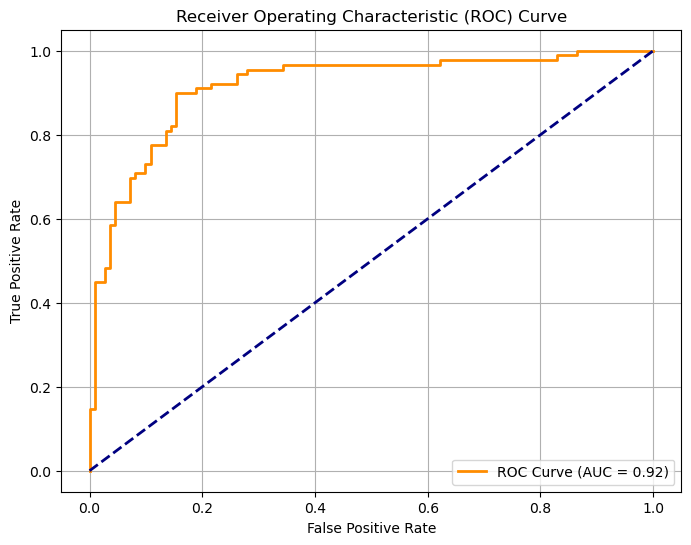

In [216]:
from sklearn.metrics import roc_curve, roc_auc_score
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid()
plt.show()

### Key Components of a ROC Curve
##### * True Positive Rate (TPR): Also known as sensitivity or recall, it is plotted on the y-axis. It represents the proportion of actual positives that are correctly identified by the model.
##### * False Positive Rate (FPR): This is plotted on the x-axis and represents the proportion of actual negatives that are incorrectly identified as positives by the model.
##### * Diagonal Line (Baseline): The diagonal line from (0,0) to (1,1) represents a classifier that makes random predictions. Any point on this line means the model has no discrimination capability between the positive and negative classes.
##### * ROC Curve: The curve itself plots TPR against FPR at various threshold settings. The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
##### * AUC (Area Under the Curve): The area under the ROC curve quantifies the overall ability of the model to discriminate between positive and negative classes. AUC values range from 0 to 1

## As the accuracy acheived from the regression model is 0.86 and also the Area under the curve is 0.92, we can conclude the created model is a good model 